In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df=pd.read_csv('/content/ttc-bus-delay-data-2022.csv')

In [3]:
df

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0
...,...,...,...,...,...,...,...,...,...,...
27346,30-Jun-22,123,00:45,Thursday,SHERWAY GARDENS RD,Operations - Operator,27,54,E,8088
27347,30-Jun-22,102,01:08,Thursday,WARDEN AND DANFORTH,Operations - Operator,30,60,S,3416
27348,30-Jun-22,66,01:15,Thursday,UNKNOWN,Operations - Operator,30,30,NaN,0
27349,30-Jun-22,32,01:33,Thursday,RENFORTH STATION,Cleaning - Unsanitary,18,36,E,1202


In [4]:
df.isnull().sum()

,0
Date,0
Route,164
Time,0
Day,0
Location,0
Incident,0
Min Delay,0
Min Gap,0
Direction,5577
Vehicle,0


In [5]:
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])
df['Direction'] = df['Direction'].fillna('Unknown')

In [6]:
df['Date']=pd.to_datetime(df['Date'])

/tmp/ipython-input-3023999556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [7]:
df['Time']=pd.to_datetime(df['Time'])

/tmp/ipython-input-3907310423.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


In [8]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

/tmp/ipython-input-135895607.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))


In [9]:
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year
df['DayOfWeek'] = df['DateTime'].dt.day_name()


In [10]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(time_of_day)


In [11]:
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)


In [12]:
route_delay_avg = df.groupby('Route')['Min Delay'].mean()
df['AvgRouteDelay'] = df['Route'].map(route_delay_avg)

direction_delay_avg = df.groupby('Direction')['Min Delay'].mean()
df['AvgDirectionDelay'] = df['Direction'].map(direction_delay_avg)


In [13]:
df

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,DateTime,Hour,Minute,Month,Year,DayOfWeek,TimeOfDay,IsWeekend,AvgRouteDelay,AvgDirectionDelay
0,2022-01-01,320,2025-10-18 02:00:00,1,YONGE AND DUNDAS,General Delay,0,0,Unknown,8531,2022-01-01 02:00:00-18:00,2,0,1,2022,Saturday,Night,1,13.010453,21.641564
1,2022-01-01,325,2025-10-18 02:00:00,1,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658,2022-01-01 02:00:00-18:00,2,0,1,2022,Saturday,Night,1,73.200000,19.888453
2,2022-01-01,320,2025-10-18 02:00:00,1,YONGE AND STEELES,Operations - Operator,17,20,S,0,2022-01-01 02:00:00-18:00,2,0,1,2022,Saturday,Night,1,13.010453,18.111927
3,2022-01-01,320,2025-10-18 02:07:00,1,YONGE AND STEELES,Operations - Operator,4,11,S,0,2022-01-01 02:07:00-18:00,2,7,1,2022,Saturday,Night,1,13.010453,18.111927
4,2022-01-01,320,2025-10-18 02:13:00,1,YONGE AND STEELES,Operations - Operator,4,8,S,0,2022-01-01 02:13:00-18:00,2,13,1,2022,Saturday,Night,1,13.010453,18.111927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27346,2022-06-30,123,2025-10-18 00:45:00,30,SHERWAY GARDENS RD,Operations - Operator,27,54,E,8088,2022-06-30 00:45:00-18:00,0,45,6,2022,Thursday,Night,0,19.846154,18.726765
27347,2022-06-30,102,2025-10-18 01:08:00,30,WARDEN AND DANFORTH,Operations - Operator,30,60,S,3416,2022-06-30 01:08:00-18:00,1,8,6,2022,Thursday,Night,0,18.628986,18.111927
27348,2022-06-30,66,2025-10-18 01:15:00,30,UNKNOWN,Operations - Operator,30,30,Unknown,0,2022-06-30 01:15:00-18:00,1,15,6,2022,Thursday,Night,0,37.166667,21.641564
27349,2022-06-30,32,2025-10-18 01:33:00,30,RENFORTH STATION,Cleaning - Unsanitary,18,36,E,1202,2022-06-30 01:33:00-18:00,1,33,6,2022,Thursday,Night,0,15.989691,18.726765


In [14]:
df['Delay_Status'] = df['Min Delay'].apply(lambda x: 'Delayed' if x > 0 else 'On Time')


In [15]:
df.columns

Index(['Date', 'Route', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Direction', 'Vehicle', 'DateTime', 'Hour', 'Minute',
       'Month', 'Year', 'DayOfWeek', 'TimeOfDay', 'IsWeekend', 'AvgRouteDelay',
       'AvgDirectionDelay', 'Delay_Status'],
      dtype='object')

In [16]:
df.drop(['Date', 'Time', 'Day', 'Vehicle', 'DateTime',
         'Minute', 'Year', 'Min Delay'], axis=1, inplace=True)

In [17]:
df

,Route,Location,Incident,Min Gap,Direction,Hour,Month,DayOfWeek,TimeOfDay,IsWeekend,AvgRouteDelay,AvgDirectionDelay,Delay_Status
0,320,YONGE AND DUNDAS,General Delay,0,Unknown,2,1,Saturday,Night,1,13.010453,21.641564,On Time
1,325,OVERLEA AND THORCLIFFE,Diversion,161,W,2,1,Saturday,Night,1,73.200000,19.888453,Delayed
2,320,YONGE AND STEELES,Operations - Operator,20,S,2,1,Saturday,Night,1,13.010453,18.111927,Delayed
3,320,YONGE AND STEELES,Operations - Operator,11,S,2,1,Saturday,Night,1,13.010453,18.111927,Delayed
4,320,YONGE AND STEELES,Operations - Operator,8,S,2,1,Saturday,Night,1,13.010453,18.111927,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27346,123,SHERWAY GARDENS RD,Operations - Operator,54,E,0,6,Thursday,Night,0,19.846154,18.726765,Delayed
27347,102,WARDEN AND DANFORTH,Operations - Operator,60,S,1,6,Thursday,Night,0,18.628986,18.111927,Delayed
27348,66,UNKNOWN,Operations - Operator,30,Unknown,1,6,Thursday,Night,0,37.166667,21.641564,Delayed
27349,32,RENFORTH STATION,Cleaning - Unsanitary,36,E,1,6,Thursday,Night,0,15.989691,18.726765,Delayed


In [18]:
df['Location'].nunique()

5942

In [19]:
df.drop('Location', axis=1, inplace=True)

In [32]:
df_encoded = pd.get_dummies(df,
                            columns=['Route', 'Incident', 'Direction', 'DayOfWeek', 'TimeOfDay'],
                            drop_first=True)

In [21]:
df_encoded['Delay_Status'] = df_encoded['Delay_Status'].map({'On Time': 0, 'Delayed': 1})

In [22]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Min Gap', 'Hour', 'Month', 'AvgRouteDelay', 'AvgDirectionDelay']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [23]:
X = df_encoded.drop('Delay_Status', axis=1)
y = df_encoded['Delay_Status']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=42,
                                                    stratify=y)

In [25]:
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("Target distribution:\n", y.value_counts(normalize=True))

Training shape: (16410, 263)
Testing shape: (10941, 263)
Target distribution:
 Delay_Status
1    0.95247
0    0.04753
Name: proportion, dtype: float64


In [28]:
!pip install xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Identify categorical and numerical columns *after* the split
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Create a column transformer to apply one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Train & evaluate all
results = []

for name, model in models.items():
    # Create a pipeline that first preprocesses and then trains the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])

# Show results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
results_df = results_df.sort_values(by="F1-Score", ascending=False)
print(results_df)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:47:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 15630, number of negative: 780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 16410, number of used features: 176
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.952468 -> initscore=2.997654
[LightGBM] [Info] Start training from score 2.997654


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


                 Model  Accuracy  Precision    Recall  F1-Score
2        Random Forest  0.996435   0.998081  0.998177  0.998129
9             CatBoost  0.995887   0.998080  0.997601  0.997840
5    Gradient Boosting  0.995704   0.998271  0.997217  0.997744
8             LightGBM  0.995521   0.997697  0.997601  0.997649
6             AdaBoost  0.992962   0.999228  0.993379  0.996295
1        Decision Tree  0.992322   0.995684  0.996258  0.995971
7              XGBoost  0.992322   0.996923  0.995010  0.995966
0  Logistic Regression  0.991134   0.995013  0.995682  0.995347
4                  SVM  0.989672   0.993678  0.995490  0.994583
3                  KNN  0.962892   0.965857  0.996258  0.980822


In [38]:
print(X_train.dtypes)

Min Gap                float64
Hour                   float64
Month                  float64
IsWeekend                int64
AvgRouteDelay          float64
                        ...   
DayOfWeek_Tuesday         bool
DayOfWeek_Wednesday       bool
TimeOfDay_Evening         bool
TimeOfDay_Morning         bool
TimeOfDay_Night           bool
Length: 263, dtype: object


/tmp/ipython-input-4172443585.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(15), y=importances.head(15).index, palette='viridis')


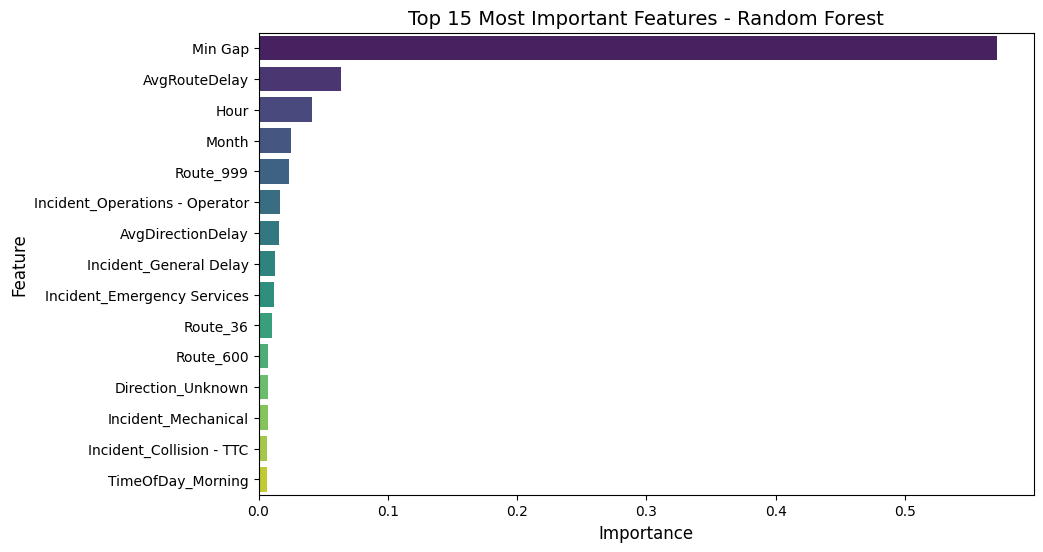

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame for feature importances
importances = pd.Series(models['Random Forest'].feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot top 15
plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(15), y=importances.head(15).index, palette='viridis')
plt.title("Top 15 Most Important Features - Random Forest", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


In [43]:
df.corr(numeric_only=True)['Min Gap'].sort_values(ascending=False)


,Min Gap
Min Gap,1.000000
AvgRouteDelay,0.303174
AvgDirectionDelay,0.142218
IsWeekend,0.037249
Hour,-0.004971
Month,-0.005124


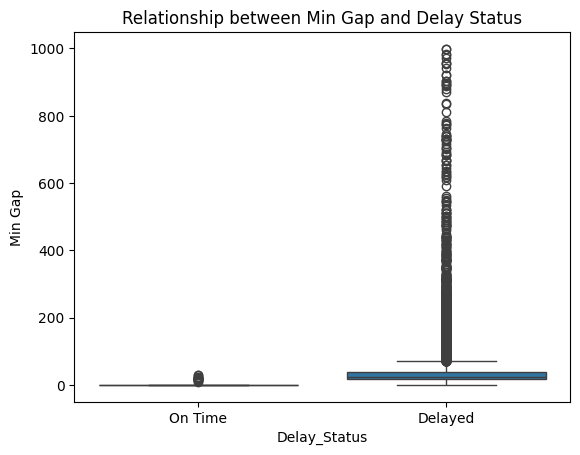

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Delay_Status', y='Min Gap', data=df)
plt.title('Relationship between Min Gap and Delay Status')
plt.show()


In [46]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Identify categorical and numerical columns *after* the split
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Create a column transformer to apply one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Create the pipeline for the Random Forest model
best_rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', RandomForestClassifier())])

# Train the Random Forest model using the pipeline
best_rf_pipeline.fit(X_train, y_train)


# Save the trained Random Forest pipeline
joblib.dump(best_rf_pipeline, 'bus_delay_rf_model.pkl')

print("✅ Model saved as bus_delay_rf_model.pkl")

✅ Model saved as bus_delay_rf_model.pkl


In [47]:
import joblib
import pandas as pd

# Load the saved model
loaded_model = joblib.load('bus_delay_rf_model.pkl')

print("✅ Model loaded successfully.")

✅ Model loaded successfully.
